# Intro to HDF5 data model

* High-level overview of the HDF5 file strudcture and basic tools


## What's HDF5?

* HDF5 = Hierarchical Data Format Version 5
* A file format optimized for numeric data
* A hierarquichal structure to store information (like folders)
* A self-describing container: Metadata + Data
* A library with several functionalities (tools)
* High level from user side (easy access) / Low level from machine side (binary, compressible)
* Fast I/O, parallel reading/writing (!), very good for HPC
* Data can be read/written in chuncks, in-memory, out-of-memory  

Read more: [https://www.hdfgroup.org/solutions/hdf5/](https://www.hdfgroup.org/solutions/hdf5/) 

## How popular is it?
* Matlab `*.m` files **are** HDF5!
* NetCDF4 files **are** HDF5!
* ICESat-2 data comes in HDF5

## Write data to HDF5

Let's create some fake data

In [4]:
%matplotlib inline

In [5]:
import h5py
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

print(x)

[-1.17810300e+00  4.92165922e-01 -6.28310766e-01 -1.01736856e+00
 -2.75882985e-02 -1.31115622e+00 -1.03739686e+00  7.85862355e-01
 -9.57980538e-01 -9.83571900e-03 -9.77938307e-01 -5.63877665e-01
 -1.54177295e+00 -2.68832360e-01  6.50000763e-01  4.54624034e-02
 -1.39600018e+00  2.77440145e-01 -3.30264003e-01  9.43053364e-03
  8.49028964e-01 -2.16018101e+00 -2.98947778e-01  1.41343155e-03
  4.56584580e-01 -4.56783842e-01  1.31501647e+00 -1.84023042e+00
  3.92644928e-01 -2.10216420e-01 -5.35963880e-01  4.64478172e-01
  6.13842854e-01  4.31984257e-01 -1.35627322e+00  4.59049557e-01
  8.28192468e-01 -1.94771227e+00 -9.61864020e-01  3.10717381e-01
 -1.13429020e+00 -3.97000355e-01 -1.58854125e+00  5.99333245e-01
 -2.19463457e-01  7.00161994e-01 -1.63350082e+00  2.78043299e-01
 -5.43529821e-01 -1.68733339e+00 -1.01407576e+00 -1.60827872e-01
 -4.75821670e-01  7.80836557e-02  1.28097527e+00 -6.25748168e-01
  7.26383363e-01 -2.58838384e-01 -7.95933765e-01  2.83112535e-01
 -4.52171829e-01  3.43425

Save 1D arrays to file

In [6]:
#!rm myfile.h5                           # remove old file if previously written
#!rm data/*_gt*                          # remove existing data just in case

with h5py.File('myfile.h5', 'w') as f:  # open file in write mode
    f['x'] = x                          # write data
    f['y'] = y
    f['z'] = z

In [7]:
!ls *.h5  # Check the file was created

myfile.h5


**NOTE:**  
**The HDF5 library comes with some useful command-line tools**  
**There is no need to write code to inspect an HDF5 file!**

In [8]:
!h5ls myfile.h5  # inspect the file w/command-line tools

x                        Dataset {100}
y                        Dataset {100}
z                        Dataset {100}


OBS: More sophysticated command-line tools below.


## Read data from HDF5

Load data (in memory) vs. get pointer (out of memory)

In [9]:
with h5py.File('myfile.h5', 'r') as f:  # open file
    x = f['x'][:]                       # read data into memory
    y = f['y']                          # get pointer to data on disk
    
    print('x (in mem): ', x)
    print('y (on disk):', y)
    print('')
    print('x (in mem): ', type(x))
    print('y (on disk):', type(y))
    print('')
    print('x (in mem): ', x.shape)
    print('y (on disk):', y.shape)  # same info from out-of-memory array

x (in mem):  [-1.17810300e+00  4.92165922e-01 -6.28310766e-01 -1.01736856e+00
 -2.75882985e-02 -1.31115622e+00 -1.03739686e+00  7.85862355e-01
 -9.57980538e-01 -9.83571900e-03 -9.77938307e-01 -5.63877665e-01
 -1.54177295e+00 -2.68832360e-01  6.50000763e-01  4.54624034e-02
 -1.39600018e+00  2.77440145e-01 -3.30264003e-01  9.43053364e-03
  8.49028964e-01 -2.16018101e+00 -2.98947778e-01  1.41343155e-03
  4.56584580e-01 -4.56783842e-01  1.31501647e+00 -1.84023042e+00
  3.92644928e-01 -2.10216420e-01 -5.35963880e-01  4.64478172e-01
  6.13842854e-01  4.31984257e-01 -1.35627322e+00  4.59049557e-01
  8.28192468e-01 -1.94771227e+00 -9.61864020e-01  3.10717381e-01
 -1.13429020e+00 -3.97000355e-01 -1.58854125e+00  5.99333245e-01
 -2.19463457e-01  7.00161994e-01 -1.63350082e+00  2.78043299e-01
 -5.43529821e-01 -1.68733339e+00 -1.01407576e+00 -1.60827872e-01
 -4.75821670e-01  7.80836557e-02  1.28097527e+00 -6.25748168e-01
  7.26383363e-01 -2.58838384e-01 -7.95933765e-01  2.83112535e-01
 -4.52171829

## Append data to HDF5

Let's add some data with specific paths (groups)

In [10]:
with h5py.File('myfile.h5', 'a') as f:
    f['/path/to/data/vec'] = z**2
    f['/path/to/data/mat'] = z.reshape(10,10)
    
    # NOTE: 'path', 'to' and 'data' are groups
    # 'vec' and 'mat' are datasets

In [11]:
# Inspect file from the command line
!h5ls -r myfile.h5

/                        Group
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Now our HDF5 file has some structure!

## Add metadata to HDF5

Let's first inpect the metadata added by default

In [12]:
# Inspect Metadate from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
            }
            DATASET "vec" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
            }
         }
      }
   }
   DATASET "x" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "y" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "z" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
}
}


Let's add our own metadata

In [13]:
with h5py.File('myfile.h5', 'a') as f:
    g = f['/path']               # pointer to group 'path'
    d = f['/path/to/data/mat']   # pointer to dataset 'mat'
    
    # Metadata for the group
    g.attrs['Description'] = 'This is a group'
    g.attrs['Author'] = 'Your name'
    g.attrs['email'] = 'yourname@domain.com'
    
    # Metadata for the data
    d.attrs['Description'] = 'This is an array'
    d.attrs['Date'] = '2019-06-01'
    d.attrs['Version'] = '1.2'

In [14]:
# Inspect Metadata from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      ATTRIBUTE "Author" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "Description" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "email" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
               ATTRIBUTE "Date" {
                  DATATYPE  H5T_S

## Inspect HDF5 from Python

Let's do the same as above but using Python code

In [15]:
f = h5py.File('myfile.h5', 'r')  # keep it open

# Inspect base groups quickly
print(f.keys())

<KeysViewHDF5 ['path', 'x', 'y', 'z']>


Inspect the full structure w/metadata

In [16]:
def print_attrs(name, obj):
    print(name)
    for key,val in obj.attrs.items():
        print("    %s: %s" % (key, val))

f.visititems(print_attrs)        

path
    Author: Your name
    Description: This is a group
    email: yourname@domain.com
path/to
path/to/data
path/to/data/mat
    Date: 2019-06-01
    Description: This is an array
    Version: 1.2
path/to/data/vec
x
y
z


In [17]:
f.close()

## Create an extendable dataset

Create an empty container (called `grids`) extendable in the 3rd dim

In [18]:
with h5py.File('myfile.h5', 'a') as f:
    dset = f.create_dataset("grids", (10,10,5), maxshape=(10,10,None), dtype='f4', compression='gzip')

Check that our created container has an infinity dimension

In [19]:
!h5ls -r myfile.h5

/                        Group
/grids                   Dataset {10, 10, 5/Inf}
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Create a bunch of 2D grids to save to our empty container

In [20]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10

(5, 10, 10)


Save grids one at a time and close the file

In [21]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g

Read in (select) specific grids with fancy indexing

In [22]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

(10, 10, 3)


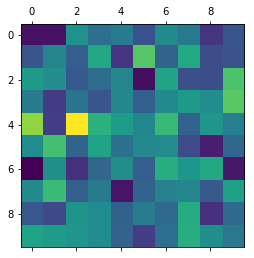

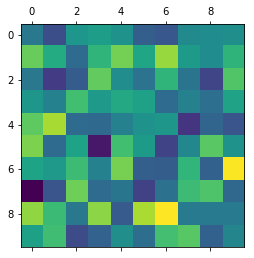

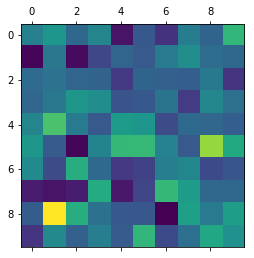

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot each grid to check dimensions are right
[plt.matshow(mygrids[:,:,k]) for k in range(mygrids.shape[2])]
plt.show()

## Final thoughts on HDF5

- Many small files is usually more practical than a few large ones
- Read/Write is faster on smaller files (faster queries)
- Network transfer is usually faster with smaller files
- Storing a lot of data into a single file is susceptible to corruption
- Many small files simplifies (embarrasingly) parallelization

---